# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [105]:
#QTDGESTANT quantidade de gestações anterior ao parto cadastrado
#QTDPARTNOR quantidade de partos normais anterior ao parto cadastrado
#QTDPARCES quantidade de partos cesáreos anterior ao parto cadastrado

sinasc_1 = sinasc_raw[['QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'munResLat']].copy()
sinasc_1.head(3)

,IDADEMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,munResLat
0,19,0.0,0.0,0.0,-11.93554
1,29,1.0,0.0,1.0,-11.93554
2,37,2.0,1.0,1.0,-11.93554


In [111]:
sinasc_1['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [114]:
latitude = pd.cut(sinasc_1['munResLat'], [-13.49, -10.5, -8.76], labels=['Abaixo', 'Acima'])

0        Abaixo
1        Abaixo
2        Abaixo
3        Abaixo
4        Abaixo
          ...  
27023    Abaixo
27024    Abaixo
27025    Abaixo
27026    Abaixo
27027    Abaixo
Name: munResLat, Length: 27028, dtype: category
Categories (2, object): ['Abaixo' < 'Acima']

In [124]:
sinasc_1.pivot_table(values = ['QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES'],
                     index = latitude,
                     aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                             mean                        \
          QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT QTDPARTCES QTDPARTNOR   
munResLat                                                                     
Abaixo       15219.0     7052.0     5782.0   1.187037   0.552665   0.453668   
Acima        17615.0     6041.0     8771.0   1.364024   0.487335   0.711759   

                 min                              max  ...             \
          QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT  ... QTDPARTNOR   
munResLat                                              ...              
Abaixo           0.0        0.0        0.0       15.0  ...       41.0   
Acima            0.0        0.0        0.0       52.0  ...       40.0   

              median                              std                        \
          QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT QTDPARTCES QTDPARTNOR   
munResLat                                                                     
Abaixo           1.0        0.0        0.0   1.305499   0.753007   1.125619   
Acima            1.0        0.0        0.0   1.492482   0.737899   1.279042   

                 var                        
          QTDGESTANT QTDPARTCES QTDPARTNOR  
munResLat                                   
Abaixo      1.704328   0.567020   1.267019  
Acima       2.227501   0.544495   1.635949  

[2 rows x 21 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [125]:
sinasc_2 = sinasc_raw[['QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'munResArea']].copy()
sinasc_2.head(3)

,QTDGESTANT,QTDPARTNOR,QTDPARTCES,munResArea
0,0.0,0.0,0.0,7067.025
1,1.0,0.0,1.0,7067.025
2,2.0,1.0,1.0,7067.025


In [130]:
area = pd.cut(sinasc_2['munResArea'], [459, 3000, 34096], labels=['Abaixo', 'Acima'])

In [134]:
sinasc_2.groupby(area).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDGESTANT                                                  \
                  sum      mean  min   max median       std       var   
munResArea                                                              
Abaixo         5870.0  1.134300  0.0   9.0    1.0  1.208914  1.461473   
Acima         16307.0  1.235379  0.0  52.0    1.0  1.443369  2.083315   

           QTDPARTNOR                 ... QTDPARTCES                      \
                  sum      mean  min  ...     median       std       var   
munResArea                            ...                                  
Abaixo         1912.0  0.371334  0.0  ...        0.0  0.749368  0.561553   
Acima          6943.0  0.543101  0.0  ...        0.0  0.748174  0.559765   

              munResArea                                              \
                     sum         mean       min        max    median   
munResArea                                                             
Abaixo      9.665178e+06  1851.921453   459.978   2944.128  1758.465   
Acima       1.000361e+08  7481.573186  3029.189  24855.724  6843.868   

                                       
                    std           var  
munResArea                             
Abaixo       709.884005  5.039353e+05  
Acima       5058.118588  2.558456e+07  

[2 rows x 28 columns]

In [131]:
sinasc_2.pivot_table(values = ['QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES'],
                     index = area,
                     aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                             mean                        \
           QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT QTDPARTCES QTDPARTNOR   
munResArea                                                                     
Abaixo         5870.0     2952.0     1912.0   1.134300   0.572981   0.371334   
Acima         16307.0     6959.0     6943.0   1.235379   0.540002   0.543101   

                  min                              max  ...             \
           QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT  ... QTDPARTNOR   
munResArea                                              ...              
Abaixo            0.0        0.0        0.0        9.0  ...       10.0   
Acima             0.0        0.0        0.0       52.0  ...       41.0   

               median                              std                        \
           QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT QTDPARTCES QTDPARTNOR   
munResArea                                                                     
Abaixo            1.0        0.0        0.0   1.208914   0.749368   0.856441   
Acima             1.0        0.0        0.0   1.443369   0.748174   1.212927   

                  var                        
           QTDGESTANT QTDPARTCES QTDPARTNOR  
munResArea                                   
Abaixo       1.461473   0.561553   0.733490  
Acima        2.083315   0.559765   1.471192  

[2 rows x 21 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [135]:
sinasc_3 = sinasc_raw[['QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'munResAlt']].copy()
sinasc_3.head(3)

,QTDGESTANT,QTDPARTNOR,QTDPARTCES,munResAlt
0,0.0,0.0,0.0,338.0
1,1.0,0.0,1.0,338.0
2,2.0,1.0,1.0,338.0


In [139]:
altura = pd.cut(sinasc_3['munResAlt'], [85, 153, 595], labels=['Abaixo', 'Acima'])

In [140]:
sinasc_3.groupby(altura).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDGESTANT                                                  \
                 sum      mean  min   max median       std       var   
munResAlt                                                              
Abaixo       17307.0  1.418839  0.0  52.0    1.0  1.556383  2.422329   
Acima        15090.0  1.133564  0.0  12.0    1.0  1.223395  1.496696   

          QTDPARTNOR                 ... QTDPARTCES                      \
                 sum      mean  min  ...     median       std       var   
munResAlt                            ...                                  
Abaixo        8999.0  0.773974  0.0  ...        0.0  0.736807  0.542884   
Acima         5264.0  0.398064  0.0  ...        0.0  0.752433  0.566156   

           munResAlt                                               \
                 sum        mean    min    max median         std   
munResAlt                                                           
Abaixo     1407113.0  105.917426   87.0  153.0   87.0   25.844639   
Acima      3405102.0  254.017307  154.0  595.0  191.0  136.992587   

                         
                    var  
munResAlt                
Abaixo       667.945379  
Acima      18766.968963  

[2 rows x 28 columns]

In [141]:
sinasc_3.pivot_table(values = ['QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES'],
                     index = altura,
                     aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                             mean                        \
          QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT QTDPARTCES QTDPARTNOR   
munResAlt                                                                     
Abaixo       17307.0     5558.0     8999.0   1.418839   0.475490   0.773974   
Acima        15090.0     7439.0     5264.0   1.133564   0.561519   0.398064   

                 min                              max  ...             \
          QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT  ... QTDPARTNOR   
munResAlt                                              ...              
Abaixo           0.0        0.0        0.0       52.0  ...       40.0   
Acima            0.0        0.0        0.0       12.0  ...       41.0   

              median                              std                        \
          QTDGESTANT QTDPARTCES QTDPARTNOR QTDGESTANT QTDPARTCES QTDPARTNOR   
munResAlt                                                                     
Abaixo           1.0        0.0        0.0   1.556383   0.736807   1.357675   
Acima            1.0        0.0        0.0   1.223395   0.752433   1.018270   

                 var                        
          QTDGESTANT QTDPARTCES QTDPARTNOR  
munResAlt                                   
Abaixo      2.422329   0.542884   1.843283  
Acima       1.496696   0.566156   1.036874  

[2 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [152]:
sinasc_4 = sinasc_raw[['IDADEMAE', 'munResLat', 'DTNASC']].copy()
sinasc_4.head()

,IDADEMAE,munResLat,DTNASC
0,19,-11.93554,2019-02-19
1,29,-11.93554,2019-02-21
2,37,-11.93554,2019-02-25
3,30,-12.13178,2019-03-20
4,30,-11.93554,2019-03-23


In [156]:
sinasc_4['latitude'] = pd.cut(sinasc_4['munResLat'], [-13.49, -10.5, -8.76], labels=['PortoVelho', 'JiParana'])

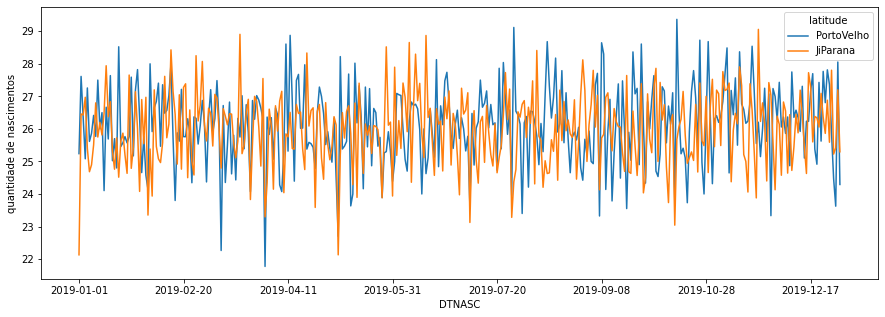

In [165]:
sinasc_4.groupby(['DTNASC', 'latitude'])['IDADEMAE'].mean().unstack().plot(figsize=[15,5])
plt.ylabel('quantidade de nascimentos');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [223]:
mapping1 = {'Porto Velho': 'Alto',
           'Vilhena': 'Alto',
           'Cacoal': 'Alto',
           'Ji-Paraná':'Alto',
           'Pimenta Bueno':'Alto',
           'Ariquemes':'Alto',
           'Rolim de Moura':'Alto',
           'Cerejeiras': 'Medio',
           'Jaru':'Medio',
           'Colorado do Oeste':'Medio',
           'Ouro Preto do Oeste':'Medio',
           'Espigão dOeste':'Medio',
           'Santa Luzia dOeste':'Medio',
           'Pimenteiras do Oeste':'Medio',
           'Presidente Médici':'Medio',
           'Castanheiras':'Medio',
           'Guajará-Mirim':'Medio',
           'Chupinguaia':'Medio',
           'Cabixi':'Medio',
           'Candeias do Jamari':'Medio',
           'São Felipe dOeste':'Medio',
           'Cacaulândia':'Medio',
           'São Miguel do Guaporé':'Medio',
           'Mirante da Serra':'Medio',
           'Alvorada dOeste':'Medio',
           'Teixeirópolis':'Medio',
           'Nova Brasilândia dOeste':'Medio',
           'Rio Crespo':'Medio',
           'Primavera de Rondônia':'Medio',
           'Alta Floresta dOeste':'Medio',
           'Ministro Andreazza':'Medio',
           'Novo Horizonte do Oeste':'Medio',
           'Vale do Paraíso':'Medio',
           'Alto Paraíso':'Medio',
           'Parecis':'Medio',
           'Buritis':'Medio',
           'Itapuã do Oeste':'Medio',
           'Corumbiara':'Medio',
           'Cujubim':'Medio',
           'Costa Marques':'Medio',
           'São Francisco do Guaporé':'Medio',
           'Urupá':'Medio',
           'Monte Negro':'Medio',
           'Seringueiras':'Baixo',
           'Governador Jorge Teixeira':'Baixo',
           'Machadinho dOeste':'Baixo',
           'Campo Novo de Rondônia':'Baixo',
           'Alto Alegre dos Parecis':'Baixo',
           'Theobroma':'Baixo',
           'Nova União':'Baixo',
           'Nova Mamoré':'Baixo',
           'Vale do Anari':'Baixo',
}


In [229]:
sinasc_5 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'PESO', 'QTDGESTANT','munResNome']].copy()
sinasc_5.head()

,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT,PESO,QTDGESTANT,munResNome
0,19,26.0,0.0,0.0,3685,0.0,Alta Floresta D'Oeste
1,29,24.0,1.0,0.0,3055,1.0,Alta Floresta D'Oeste
2,37,32.0,2.0,0.0,3460,2.0,Alta Floresta D'Oeste
3,30,24.0,0.0,0.0,2982,0.0,Alto Alegre dos Parecis
4,30,27.0,1.0,0.0,3310,1.0,Alta Floresta D'Oeste


In [230]:
sinasc_5 = sinasc_5.set_index('munResNome')
sinasc_5.head()

,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT,PESO,QTDGESTANT
munResNome,,,,,,
Alta Floresta D'Oeste,19,26.0,0.0,0.0,3685,0.0
Alta Floresta D'Oeste,29,24.0,1.0,0.0,3055,1.0
Alta Floresta D'Oeste,37,32.0,2.0,0.0,3460,2.0
Alto Alegre dos Parecis,30,24.0,0.0,0.0,2982,0.0
Alta Floresta D'Oeste,30,27.0,1.0,0.0,3310,1.0


In [231]:
sinasc_5.groupby(mapping1).agg([min, 'mean', max])

IDADEMAE                IDADEPAI                  QTDFILVIVO  \
                min       mean max      min       mean   max        min   
munResNome                                                                
Alto             12  26.280332  47     15.0  31.074091  70.0        0.0   
Baixo            13  25.269231  46     16.0  30.402332  58.0        0.0   
Medio            11  25.848191  53     16.0  31.570029  73.0        0.0   

                           QTDFILMORT                 PESO                     \
                mean   max        min      mean   max  min         mean   max   
munResNome                                                                      
Alto        1.033960  12.0        0.0  0.272297  28.0  292  3245.623791  5720   
Baixo       1.056270   8.0        0.0  0.253521   6.0  730  3244.309955  4785   
Medio       1.093111  14.0        0.0  0.272386   7.0  258  3245.670333  5190   

           QTDGESTANT                  
                  min      mean   max  
munResNome                             
Alto              0.0  1.277690  14.0  
Baixo             0.0  1.225211  11.0  
Medio             0.0  1.306385  52.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [219]:
mapping2 = {'Porto Velho': 'Moderado',
           'Vilhena': 'Moderado',
           'Cacoal': 'Moderado',
           'Ji-Paraná':'Moderado',
           'Pimenta Bueno':'Moderado',
           'Ariquemes':'Moderado',
           'Rolim de Moura':'Moderado',
           'Cerejeiras': 'Moderado',
           'Jaru':'Moderado',
           'Colorado do Oeste':'Moderado',
           'Ouro Preto do Oeste':'Moderado',
           'Espigão dOeste':'Regular',
           'Santa Luzia dOeste':'Moderado',
           'Pimenteiras do Oeste':'Moderado',
           'Presidente Médici':'Moderado',
           'Castanheiras':'Moderado',
           'Guajará-Mirim':'Regular',
           'Chupinguaia':'Moderado',
           'Cabixi':'Regular',
           'Candeias do Jamari':'Moderado',
           'São Felipe dOeste':'Moderado',
           'Cacaulândia':'Regular',
           'São Miguel do Guaporé':'Moderado',
           'Mirante da Serra':'Regular',
           'Alvorada dOeste':'Regular',
           'Teixeirópolis':'Moderado',
           'Nova Brasilândia dOeste':'Regular',
           'Rio Crespo':'Moderado',
           'Primavera de Rondônia':'Moderado',
           'Alta Floresta dOeste':'Regular',
           'Ministro Andreazza':'Regular',
           'Novo Horizonte do Oeste':'Regular',
           'Vale do Paraíso':'Regular',
           'Alto Paraíso':'Regular',
           'Parecis':'Regular',
           'Buritis':'Moderado',
           'Itapuã do Oeste':'Regular',
           'Corumbiara':'Regular',
           'Cujubim':'Regular',
           'Costa Marques':'Regular',
           'São Francisco do Guaporé':'Moderado',
           'Urupá':'Regular',
           'Monte Negro':'Moderado',
           'Seringueiras':'Regular',
           'Governador Jorge Teixeira':'Regular',
           'Machadinho dOeste':'Regular',
           'Campo Novo de Rondônia':'Regular',
           'Alto Alegre dos Parecis':'Regular',
           'Theobroma':'Regular',
           'Nova União':'Regular',
           'Nova Mamoré':'Regular',
           'Vale do Anari':'Regular',
}


In [232]:
sinasc_6 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'PESO', 'QTDGESTANT', 'munResNome']].copy()
sinasc_6 = sinasc_6.set_index('munResNome')
sinasc_6.groupby(mapping2).agg([min, 'mean', max])

IDADEMAE                IDADEPAI                  QTDFILVIVO  \
                min       mean max      min       mean   max        min   
munResNome                                                                
Moderado         12  26.224821  53     15.0  31.144187  70.0        0.0   
Regular          11  25.453326  52     16.0  31.332960  73.0        0.0   

                           QTDFILMORT                 PESO                     \
                mean   max        min      mean   max  min         mean   max   
munResNome                                                                      
Moderado    1.031113  12.0        0.0  0.272404  28.0  258  3244.314074  5720   
Regular     1.162999  14.0        0.0  0.265638   7.0  425  3252.581646  5070   

           QTDGESTANT                  
                  min      mean   max  
munResNome                             
Moderado          0.0  1.263286  14.0  
Regular           0.0  1.388933  52.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [221]:
mapping3 = {'Porto Velho': 'Acima 1 Bilhão',
           'Vilhena': 'Acima 1 Bilhão',
           'Cacoal': 'Acima 1 Bilhão',
           'Ji-Paraná':'Acima 1 Bilhão',
           'Pimenta Bueno':'Acima 1 Bilhão',
           'Ariquemes':'Acima 1 Bilhão',
           'Rolim de Moura':'Acima 1 Bilhão',
           'Cerejeiras': 'Acima 500 Milhões',
           'Jaru':'Acima 1 Bilhão',
           'Colorado do Oeste':'Acima 300 Milhões',
           'Ouro Preto do Oeste':'Acima 500 Milhões',
           'Espigão dOeste':'Acima 500 Milhões',
           'Santa Luzia dOeste':'Acima 100 Milhões',
           'Pimenteiras do Oeste':'Ate 100 Milhões',
           'Presidente Médici':'Acima 300 Milhões',
           'Castanheiras':'Ate 100 Milhões',
           'Guajará-Mirim':'Acima 500 Milhões',
           'Chupinguaia':'Acima 100 Milhões',
           'Cabixi':'Acima 100 Milhões',
           'Candeias do Jamari':'Acima 500 Milhões',
           'São Felipe dOeste':'Ate 100 Milhões',
           'Cacaulândia':'Acima 100 Milhões',
           'São Miguel do Guaporé':'Acima 500 Milhões',
           'Mirante da Serra':'Acima 100 Milhões',
           'Alvorada dOeste':'Acima 200 Milhões',
           'Teixeirópolis':'Ate 100 Milhões',
           'Nova Brasilândia dOeste':'Acima 300 Milhões',
           'Rio Crespo':'Ate 100 Milhões',
           'Primavera de Rondônia':'Ate 100 Milhões',
           'Alta Floresta dOeste':'Acima 300 Milhões',
           'Ministro Andreazza':'Acima 100 Milhões',
           'Novo Horizonte do Oeste':'Acima 100 Milhões',
           'Vale do Paraíso':'Acima 100 Milhões',
           'Alto Paraíso':'Acima 300 Milhões',
           'Parecis':'Ate 100 Milhões',
           'Buritis':'Acima 500 Milhões',
           'Itapuã do Oeste':'Acima 100 Milhões',
           'Corumbiara':'Acima 100 Milhões',
           'Cujubim':'Acima 300 Milhões',
           'Costa Marques':'Acima 100 Milhões',
           'São Francisco do Guaporé':'Acima 300 Milhões',
           'Urupá':'Acima 100 Milhões',
           'Monte Negro':'Acima 200 Milhões',
           'Seringueiras':'Acima 100 Milhões',
           'Governador Jorge Teixeira':'Acima 100 Milhões',
           'Machadinho dOeste':'Acima 500 Milhões',
           'Campo Novo de Rondônia':'Acima 200 Milhões',
           'Alto Alegre dos Parecis':'Acima 200 Milhões',
           'Theobroma':'Acima 100 Milhões',
           'Nova União':'Ate 100 Milhões',
           'Nova Mamoré':'Acima 500 Milhões',
           'Vale do Anari':'Acima 100 Milhões',
}

In [233]:
sinasc_7 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'PESO', 'QTDGESTANT', 'munResNome']].copy()
sinasc_7 = sinasc_7.set_index('munResNome')
sinasc_7.groupby(mapping3).agg([min, 'mean', max])

IDADEMAE                IDADEPAI                   \
                       min       mean max      min       mean   max   
munResNome                                                            
Acima 1 Bilhão          12  26.265562  47     15.0  31.108387  70.0   
Acima 100 Milhões       12  25.638424  52     17.0  31.744348  73.0   
Acima 200 Milhões       13  25.146435  41     16.0  30.187500  55.0   
Acima 300 Milhões       11  25.706070  47     16.0  30.819149  64.0   
Acima 500 Milhões       13  25.785927  53     17.0  31.381955  60.0   
Ate 100 Milhões         14  26.519894  41     17.0  31.626126  67.0   

                  QTDFILVIVO                 QTDFILMORT                 PESO  \
                         min      mean   max        min      mean   max  min   
munResNome                                                                     
Acima 1 Bilhão           0.0  1.026435  12.0        0.0  0.270229  28.0  292   
Acima 100 Milhões        0.0  0.992320  14.0        0.0  0.239824   6.0  425   
Acima 200 Milhões        0.0  1.010526   7.0        0.0  0.263982   4.0  930   
Acima 300 Milhões        0.0  1.062097   8.0        0.0  0.251828   5.0  258   
Acima 500 Milhões        0.0  1.228385  11.0        0.0  0.319958   7.0  285   
Ate 100 Milhões          0.0  1.032258   6.0        0.0  0.172507   2.0  320   

                                     QTDGESTANT                  
                          mean   max        min      mean   max  
munResNome                                                       
Acima 1 Bilhão     3247.215719  5720        0.0  1.268052  14.0  
Acima 100 Milhões  3250.392337  4810        0.0  1.233388  52.0  
Acima 200 Milhões  3233.701349  4680        0.0  1.145669   7.0  
Acima 300 Milhões  3240.387380  4888        0.0  1.262651   9.0  
Acima 500 Milhões  3243.336315  5135        0.0  1.429716  14.0  
Ate 100 Milhões    3197.679045  4505        0.0  1.171123   7.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- A media da idades das mae mais alta se encontra na faixa do IDH mais alto, ja a maior media da idade dos pais e encontra no IDH medio. 
- A maior media de filhos vivos está na faixa do IDH medio e quantidade de gestações anteriores e existe um empate entre as médias das crianças nascidadas na faixa do IDH alto e baixo.
- A media de peso das crianças, quantidade de filhos vivos e quantidade de gestações anteriores é maior no IFDM moderado
- A media de idade das mães mais novas se encontram na faixa do PIB Acima de 200 milhoes, e a media das mais velha na faixa de até 100 milhoes.
- A quantidade de gestação anteriores tem sua maior media na faixa de PIB de Acima de 500 milhões.
